# 2 body 
It is here assumed that the sun is at standstill

In [5]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
from pysindy.feature_library import CustomLibrary
from funcs import *

def plot(x, y, x_model, y_model, error=None):
    fig, ax = plt.subplots(1, figsize=(6, 6))
    ax.plot(x, y, label='Data')
    ax.plot(x_model, y_model, label='SINDy')
    ax.plot(1, 1, color='w', label='Error = {}'.format(error))
    ax.set(xlabel='x', ylabel='y')
    ax.legend()
    
pos = np.load('Jupiter_pos.npy')
x, y = pos[:, 0], pos[:, 1]
vel = np.load('Jupiter_vel.npy')
acc = np.load('Jupiter_acc.npy')
ax, ay = acc[:, 0], acc[:, 1]

names = ['Sun', 'Jupiter']

In [2]:
functions = [lambda x,y : x/(x**2+y**2)**(3/2), 
             lambda x,y : y/(x**2+y**2)**(3/2)]

lib_custom = CustomLibrary(library_functions=functions)
optimizer = ps.STLSQ(threshold=1)

t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy( 
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x', 'y'])

model.fit(pos, t=t, x_dot=acc)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()

x1'' = -39.407 f0(x,y)
y1'' = -39.411 f1(x,y)


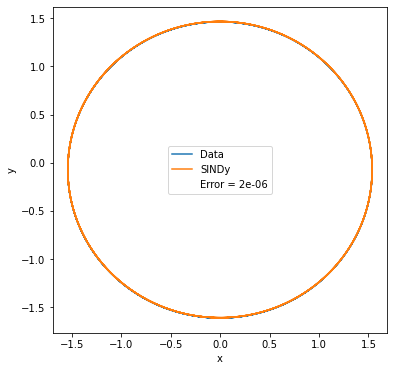

In [15]:
def f0(x, y):
    F0 = x/(x**2+y**2)**(3/2)
    return F0
    
def f1(x, y):
    F1 = y/(x**2+y**2)**(3/2)
    return F1

aSx, aSy = coef[0,0]*f0(x, y), coef[1,1]*f1(x, y)

aS = np.array([aSx, aSy])

error = round(err(acc, aS.T), 6)
errstr = str(error)

plot(ax, ay, aSx, aSy, errstr)

#plt.savefig('2_body.png')

ValueError: x and y must have same first dimension, but have shapes (1,) and (50000,)

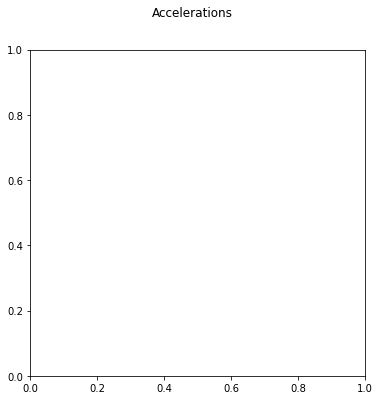

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Accelerations')
# Plots the planets
ax.plot(ax, ay, label='Data Jupiter', color='royalblue')
ax.plot(aSx, aSy, label='SINDy Jupiter', color='darkorange')    
ax.set(xlabel='x', ylabel='y') 
ax.legend()

In [ ]:
#plt.savefig('2_body.png')

Now not assuming the sun is at standstill

In [ ]:
pos = np.load('Jupiter_Sun_pos.npy')
xs, ys = pos[:, 0], pos[:, 1]
xj, yj = pos[:, 2], pos[:, 3]
vel = np.load('Jupiter_Sun_vel.npy')
acc = np.load('Jupiter_Sun_acc.npy')
axs, ays = acc[:, 0], acc[:, 1]
axj, ayj = acc[:, 2], acc[:, 3]

functions = [
    lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
    lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    ]

lib_custom = CustomLibrary(library_functions=functions)
optimizer = ps.STLSQ(threshold=1e-2)
t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy(
        feature_library = lib_custom, 
        optimizer=optimizer)

model.fit(pos, t=t, x_dot=acc)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()
print(coef)
print(coef.shape)
print(t.shape)

Using `ps.SmoothedFiniteDifference()`

In [ ]:
functions = [lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
             lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)]
diff_method = ps.SmoothedFiniteDifference()


optimizer = ps.STLSQ(threshold=1e-2)
t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy(
        differentiation_method=diff_method,
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x1', 'y1', 'x2', 'y2'])

model.fit(pos, t=t, x_dot=acc)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()
print(coef)
print(coef.shape)

In [ ]:
def f0(x1, y1, x2, y2):
    F0 = (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F0
    
def f1(x1, y1, x2, y2):
    F1 = (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F1

a1, a2, a3, a4 = coef[0,5]*f0(xs, ys, xj, yj), coef[1,11]*f1(xs, ys, xj, yj), coef[2,5]*f0(xs, ys, xj, yj), coef[3,11]*f1(xs, ys, xj, yj)

#plot(axs, ays, a1, a2)
#plot(axj, ayj, a3, a4)

In [5]:
from funcs import *

plot2(axs, ays, 'Sun', axj, ayj, 'Jupiter', a1, a2, a3, a4)
print(f'Difference in Sun ax {axs-a1}')

NameError: name 'axs' is not defined

Using Spectral diff

In [ ]:
functions = [lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
             lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)]
diff_method = ps.SINDyDerivative(kind='spectral')

optimizer = ps.STLSQ(threshold=1e-2)
t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy(
        differentiation_method=diff_method,
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x1', 'y1', 'x2', 'y2'])

model.fit(pos, t=t, x_dot=acc)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()
print(coef)
print(coef.shape)

Using SR3 optimizer

In [ ]:
functions = [
    lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
    lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    ]

optimizer = ps.SR3(threshold=1e-2, nu=1e-1)
t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy(
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x1', 'y1', 'x2', 'y2'])

model.fit(pos, t=t, x_dot=acc)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()
print(coef)
print(coef.shape)

In [ ]:
ph = np.load('JSpos_100.npy')
xhs, yhs = pos[:, 0], pos[:, 1]
xhj, yhj = pos[:, 2], pos[:, 3]
vh = np.load('JSvel_100.npy')
ah = np.load('JSacc_100.npy')
ahxs, ahys = acc[:, 0], acc[:, 1]
ahxj, ahyj = acc[:, 2], acc[:, 3]

functions = [
    lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
    lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    ]

optimizer = ps.STLSQ(threshold=1e-2)
th = np.arange(0, ph.shape[0], 1)

model = ps.SINDy(
        feature_library = lib_custom, 
        optimizer=optimizer)

model.fit(ph, t=th, x_dot=ah)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()
print(coef)
print(coef.shape)
print(th.shape)

In [20]:
pm = np.load('JSpos_mil.npy')
xms, yms = pm[:, 0], pm[:, 1]
xmj, ymj = pm[:, 2], pm[:, 3]
vm = np.load('JSvel_mil.npy')
am = np.load('JSacc_mil.npy')
amxs, amys = am[:, 0], am[:, 1]
amxj, amyj = am[:, 2], am[:, 3]

functions = [
    lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
    lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    ]

lib_custom = CustomLibrary(library_functions=functions)
optimizer = ps.STLSQ(threshold=1e-2)
tm = np.arange(0, pm.shape[0], 1)

model = ps.SINDy(
        feature_library = lib_custom, 
        optimizer=optimizer)

model.fit(pm, t=tm, x_dot=am)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()
print(coef)
print(coef.shape)
print(tm.shape)

x1'' = 0.038 f0(x0,x1,x2,x3)
y1'' = 0.038 f1(x0,x1,x2,x3)
x2'' = -39.479 f0(x0,x1,x2,x3)
y2'' = -39.479 f1(x0,x1,x2,x3)
[[ 3.76859331e-02  0.00000000e+00]
 [ 0.00000000e+00  3.76859579e-02]
 [-3.94787050e+01  0.00000000e+00]
 [ 0.00000000e+00 -3.94787311e+01]]
(4, 2)
(1000000,)


Test if it is dependent on smaller timesteps or just more data

In [8]:
coef/39.4797

array([[ 9.54565674e-04,  0.00000000e+00],
       [ 0.00000000e+00,  9.54564314e-04],
       [-1.00000001e+00,  4.68563420e-04],
       [-4.71021727e-04, -1.00000022e+00]])

In [6]:
pl = np.load("SJ_dat/1000y0.001dt/JSpos_1mil.npy") # data where weve run the sim for longer with normal dt
vl = np.load("SJ_dat/1000y0.001dt/JSvel_1mil.npy")
al = np.load("SJ_dat/1000y0.001dt/JSacc_1mil.npy")

functions = [
    lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
    lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    ]

lib_custom = CustomLibrary(library_functions=functions)
optimizer = ps.STLSQ(threshold=1e-2)
tl = np.arange(0, pl.shape[0], 1)

model = ps.SINDy(
        feature_library = lib_custom, 
        optimizer=optimizer)

model.fit(pl, t=tl, x_dot=al)
model.print(lhs=["x1''", "y1''", "x2''", "y2''"])
coef = model.coefficients()
print(coef)
print(coef.shape)

x1'' = 0.038 f0(x0,x1,x2,x3)
y1'' = 0.038 f1(x0,x1,x2,x3)
x2'' = -39.480 f0(x0,x1,x2,x3) + 0.018 f1(x0,x1,x2,x3)
y2'' = -0.019 f0(x0,x1,x2,x3) + -39.480 f1(x0,x1,x2,x3)
[[ 3.76859664e-02  0.00000000e+00]
 [ 0.00000000e+00  3.76859128e-02]
 [-3.94797003e+01  1.84987433e-02]
 [-1.85957965e-02 -3.94797088e+01]]
(4, 2)


In [7]:
aSINDy = f_2(pl, coef)

In [ ]:
np.mean(aSINDy[0]-al[:, 0])

In [ ]:
9.54758314e-4 - 9.54564884e-4

In [ ]:
0.001934300000000196e-4

In [ ]:
(np.abs(9.54758314e-4 - 9.54564884e-4)/(9.54758314e-4 + 9.54564884e-4)/2)*1000

In [ ]:
perdiff(9.54758314e-4, 9.54564884e-4)

In [ ]:
# 3_body

perdiff(9.54552519e-4, 9.54564884e-4)

In [21]:
jx = err(9.54564884e-4, 9.54565674e-04)
jy = err(9.54564884e-4, 9.54758314e-04)
np.mean([jx, jy])

2.053118444824009e-08